# Constructing a WCS for Overlappogram Data

In [6]:
import numpy as np
import astropy.units as u
from scipy.io import readsav
import sys
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize,LogStretch
import sunpy.map
from sunpy.coordinates import get_earth
sys.path.append('../scripts')
from util import make_moxsi_ndcube, construct_overlappogram

In [13]:
norm=ImageNormalize(vmin=0,vmax=1e2,stretch=LogStretch())
cmap='hinodexrt'
plot_props = {'cmap':cmap, 'norm':norm}

From the `PCi_j` formalism, the conversion between intermediate world coordinates and pixel coordinates is given by (from Gei

$$
x_i = s_iq_i \\
q_i = m_{ij}(p_j - r_j)
$$

The resulting `PC_ij` matrix for our overlappogram **assuming that the dispersion direction is aligned with the y-like pixel axis**,

$$
\begin{bmatrix}
\cos\alpha & -\sin\alpha & \mu\sin\alpha \\
\sin\alpha & \cos\alpha & -\mu\cos\alpha \\
0 & 0 & 1
\end{bmatrix}
$$

First, load the data into a spectral cube, where each slice represents a different wavelength.

In [3]:
savdata = readsav('../data/forDan_MOXSI_DATA_09112020_0440_feldman.sav')

In [4]:
moxsi_cube = make_moxsi_ndcube(savdata['moxsi1_img'],savdata['cubixss_wave']*u.angstrom)

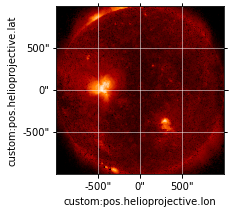

In [5]:
plt.figure(figsize=(3,8))
ax = moxsi_cube[1073//2].plot(**plot_props)
lon,lat = ax.coords
lon.grid(color='white', alpha=1, linestyle='solid', lw=.5,)
lat.grid(color='white', alpha=1, linestyle='solid', lw=.5,)

We can then flatten this to an overlappogram, specifying the roll angle (angle between the pixel and world axes, where 0 corresponds to the y-like pixel axis aligned with latitude) and spectral order.

In [8]:
observer = get_earth()

In [9]:
moxsi_overlap = construct_overlappogram(moxsi_cube, angle=0*u.deg, observer=observer, order=1)

We can then plot the overlappogram at a few different "wavelength slices." Note as we move in wavelength space, our latitude grid shifts along the dispersion axis.

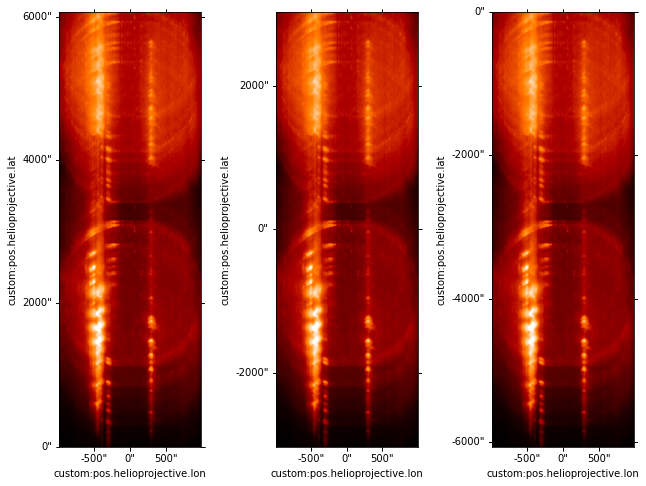

In [18]:
fig = plt.figure(figsize=(11,8))
wvl_indices = [0,1073//2,1072]
for i,iw in enumerate(wvl_indices):
    ax = fig.add_subplot(1,len(wvl_indices),i+1, projection=moxsi_overlap[iw].wcs)
    moxsi_overlap[iw].plot(axes=ax,**plot_props)

We can also choose to orient the pixel (and thus the dispersion) axis at some non-zero angle relative to the world axes.

In [19]:
moxsi_overlap = construct_overlappogram(moxsi_cube, angle=30*u.deg, observer=observer, order=1)

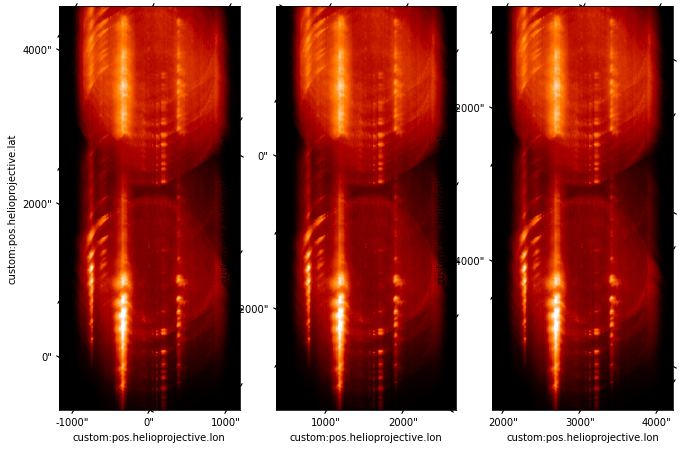

In [20]:
fig = plt.figure(figsize=(11,8))
wvl_indices = [0,1073//2,1072]
for i,iw in enumerate(wvl_indices):
    ax = fig.add_subplot(1,len(wvl_indices),i+1, projection=moxsi_overlap[iw].wcs)
    moxsi_overlap[iw].plot(axes=ax,**plot_props)

Or completely in the "longitude" direction

In [28]:
moxsi_overlap = construct_overlappogram(moxsi_cube, angle=90*u.deg, observer=observer, order=1)

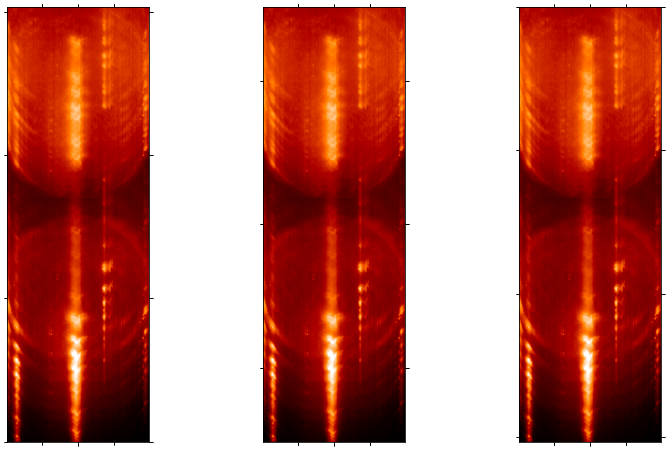

In [31]:
fig = plt.figure(figsize=(13,8))
wvl_indices = [0,1073//2,1072]
for i,iw in enumerate(wvl_indices):
    ax = fig.add_subplot(1,len(wvl_indices),i+1, projection=moxsi_overlap[iw].wcs)
    moxsi_overlap[iw].plot(axes=ax,**plot_props)
    lat,lon = ax.coords
    #lon.set_ticklabel_position('all')
    #lat.set_ticklabel_position('all')
    #lat.set_tick

In [30]:
moxsi_overlap.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'WAVE'  
CRVAL : 0.0  0.0  3.047997188568115e-09  
CRPIX : 175.5  537.0  537.0  
PC1_1 PC1_2 PC1_3  : 6.12323399573676e-17  -1.0  1.0  
PC2_1 PC2_2 PC2_3  : 1.0  6.12323399573676e-17  -6.1232339957367e-17  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 0.0015722222222222223  0.0015722222222222223  5.499994754791259e-12  
NAXIS : 350  1073  1073